# Setup

In [4]:
import tensorflow as tf
import tfx

In [5]:
from pathlib import Path
import os, pandas as pd
import PIL
import librosa

In [6]:
import fastaudio

/home/oyvind/anaconda3/envs/tfx/lib/python3.8/site-packages/torchaudio/backend/utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [7]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [8]:
NB_DIR = Path.cwd()
#LOCAL_DATA = NB_DIR/'..'/'data'
DATA = Path('/home/oyvind/Documents/DAT255/data')
AUDIO_TAGGING = DATA/'freesound-audio-tagging'

In [9]:
from fastai.vision.all import *

In [10]:
AUDIO_TAGGING.ls()

(#6) [Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/test_post_competition.csv'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/sample_submission.csv'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/train.csv'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/train_post_competition.csv'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_test'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train')]

# Loading data

In [11]:
df = pd.read_csv(AUDIO_TAGGING/'train.csv')
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [12]:
df_test = pd.read_csv(AUDIO_TAGGING/'test_post_competition.csv')
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [13]:
kind = df.loc[df['fname'].eq("00044347.wav"), 'label'].iloc[0]

In [14]:
kind

'Hi-hat'

In [15]:
df.shape

(9473, 3)

In [16]:
labels = df.label.unique()
print(labels)
print(len(labels))

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']
41


In [17]:
path = AUDIO_TAGGING/'audio_train'

In [18]:
path.ls()

(#9473) [Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/2a871432.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/704d6fc7.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/f5729f4f.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/84d0e459.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/0b3c0588.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/56a59a85.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/f8742dce.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/1f4a7bfe.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/151b80e7.wav'),Path('/home/oyvind/Documents/DAT255/data/freesound-audio-tagging/audio_train/c3015f33.wav')...]

# Exploring the data

In [19]:
from IPython.display import Audio

In [20]:
fnames = os.listdir(str(path))
len(fnames), fnames[:5]

(9473,
 ['2a871432.wav',
  '704d6fc7.wav',
  'f5729f4f.wav',
  '84d0e459.wav',
  '0b3c0588.wav'])

In [21]:
fn = fnames[5] # fart sound
label = df.loc[df['fname'].eq(fn), 'label'].iloc[0]
print(label)
fart = str(path/fn)
Audio(str(path/fn))

Fart


In [22]:
#import pickle

In [23]:
#with open(DATA/'path.pkl', 'wb') as f:
#    pickle.dump(path, f)

In [24]:
x, sample_rate = librosa.load(fart)

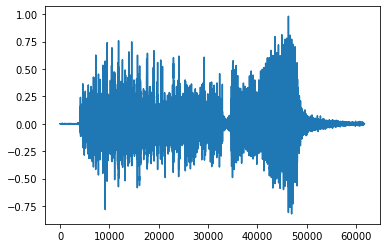

In [25]:
plt.plot(x)

```data = (ImageItemList.from_csv(PATH, folder='train', csv_file='labels.csv', cols={your_fname_col_name})
           .use_partial_data(sample_pct = .1, seed= 34)
           .random_split_by_pct(valid_pct=0.2, seed=34)
           .label_from_df(cols={your_label_cols_name})
           .transform(tfms, size = 96)
           .databunch(bs=64)).normalize(imagenet_stats)```

In [26]:
def log_spec(fname, src_path, dst_path):
    src_path, dst_path = Path(src_path), Path(dst_path)
    
    kind = df.loc[df['fname'].eq(fname), 'label'].iloc[0]
    
    dst_path = dst_path/kind
    
    dst_path.mkdir(exist_ok=True)
    
    x, sample_rate = librosa.load(src_path/fname)
    
    n_fft = 1024
    hop_length = 256
    n_mels = 40
    fmin = 20
    fmax = sample_rate / 2
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
                                               hop_length=hop_length, n_mels=n_mels, power=2.0,
                                               fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    
    dst_fname = dst_path / (fname.split(".wav")[0]+".png")
    plt.imsave(dst_fname, mel_spec_db)

In [27]:
def log_spec_test(fname, src_path, dst_path):
    src_path, dst_path = Path(src_path), Path(dst_path)
    
    kind = df_test.loc[df['fname'].eq(fname), 'label'].iloc[1]
    
    dst_path = dst_path/kind
    
    dst_path.mkdir(exist_ok=True)
    
    x, sample_rate = librosa.load(src_path/fname)
    
    n_fft = 1024
    hop_length = 256
    n_mels = 40
    fmin = 20
    fmax = sample_rate / 2
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,
                                               hop_length=hop_length, n_mels=n_mels, power=2.0,
                                               fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    
    dst_fname = dst_path / (fname.split(".wav")[0]+".png")
    plt.imsave(dst_fname, mel_spec_db)

In [28]:
dst_path = DATA/'free-sound/train'
dst_path.ls()

(#41) [Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Saxophone'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Cello'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Meow'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Bus'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Laughter'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Chime'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Bark'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Burping_or_eructation'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Bass_drum'),Path('/home/oyvind/Documents/DAT255/data/free-sound/train/Harmonica')...]

In [29]:
data_path = AUDIO_TAGGING/'audio_train/'

In [30]:
#data_path_test = AUDIO_TAGGING/'audio_test'

In [31]:
#dst_path_test = DATA/'free-sound/test'

In [32]:
def conv_spectogram(path):
    for file in os.listdir(path):
        #print(os.fsdecode(file))
        log_spec(os.fsdecode(file), data_path, dst_path)

In [33]:
def conv_spectogram_test(path):
    for file in os.listdir(path):
        #print(os.fsdecode(file))
        log_spec_test(os.fsdecode(file), data_path_test, dst_path_test)

In [34]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(),
get_y=parent_label,
item_tfms=RandomResizedCrop(128, min_scale=0.35),
batch_tfms= [*aug_transforms(size=224, max_warp=0)])

In [35]:
#dls.show_batch()

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [36]:
dls = dblock.dataloaders(dst_path)

In [37]:
dls.one_batch()

(TensorImage([[[[0.1735, 0.1848, 0.1966,  ..., 0.2301, 0.2279, 0.2225],
           [0.1704, 0.1792, 0.1890,  ..., 0.2347, 0.2327, 0.2267],
           [0.1654, 0.1725, 0.1809,  ..., 0.2373, 0.2354, 0.2310],
           ...,
           [0.1289, 0.1367, 0.1442,  ..., 0.1411, 0.1453, 0.1496],
           [0.1259, 0.1324, 0.1387,  ..., 0.1404, 0.1447, 0.1490],
           [0.1229, 0.1280, 0.1323,  ..., 0.1385, 0.1422, 0.1458]],
 
          [[0.3744, 0.3452, 0.3138,  ..., 0.2355, 0.2386, 0.2492],
           [0.3836, 0.3592, 0.3321,  ..., 0.2232, 0.2266, 0.2388],
           [0.3966, 0.3782, 0.3550,  ..., 0.2186, 0.2195, 0.2289],
           ...,
           [0.6965, 0.7028, 0.7089,  ..., 0.4569, 0.4435, 0.4338],
           [0.6930, 0.6984, 0.7032,  ..., 0.4577, 0.4449, 0.4352],
           [0.6859, 0.6886, 0.6903,  ..., 0.4630, 0.4530, 0.4445]],
 
          [[0.5590, 0.5510, 0.5426,  ..., 0.5285, 0.5308, 0.5346],
           [0.5594, 0.5533, 0.5468,  ..., 0.5257, 0.5273, 0.5314],
           [0.5598,

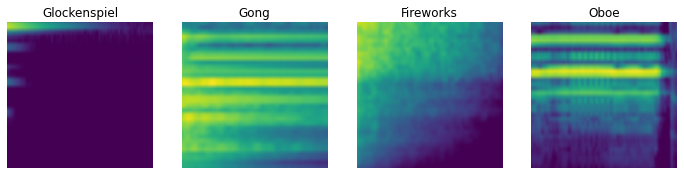

In [38]:


dls.valid.show_batch(max_n=4, nrows=1)



In [39]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

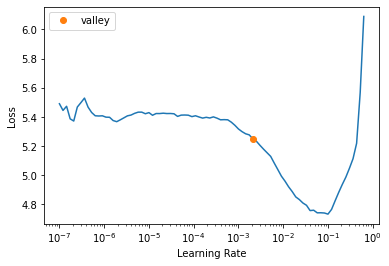

In [40]:
lr = learn.lr_find()

In [41]:
lrate = lr.valley

In [42]:
learn.fine_tune(4, lrate)

epoch,train_loss,valid_loss,error_rate,time
0,3.720782,3.424696,0.832629,00:13


epoch,train_loss,valid_loss,error_rate,time
0,2.742365,3.076209,0.765576,00:17
1,2.335523,3.065050,0.726505,00:17
2,1.980349,2.965822,0.713833,00:17
3,1.734180,2.989585,0.705385,00:16


In [43]:
interp = Interpretation.from_learner(learn)

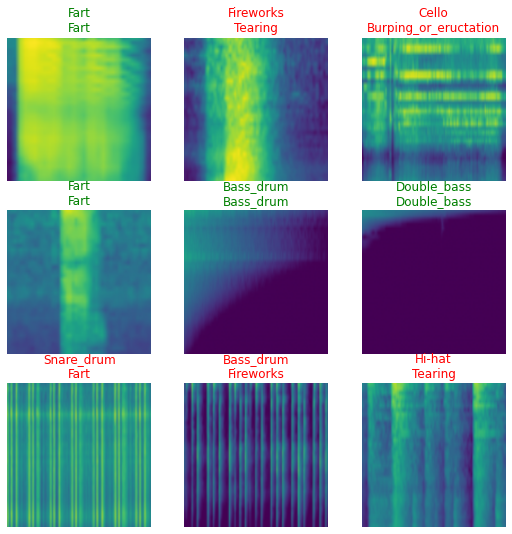

In [45]:
learn.show_results()

In [49]:
def plot_top_losses_fix(interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs, nrows=8, )
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)



In [51]:


#plot_top_losses_fix(interp, k=8)



In [52]:


a = ClassificationInterpretation.from_learner(learn)



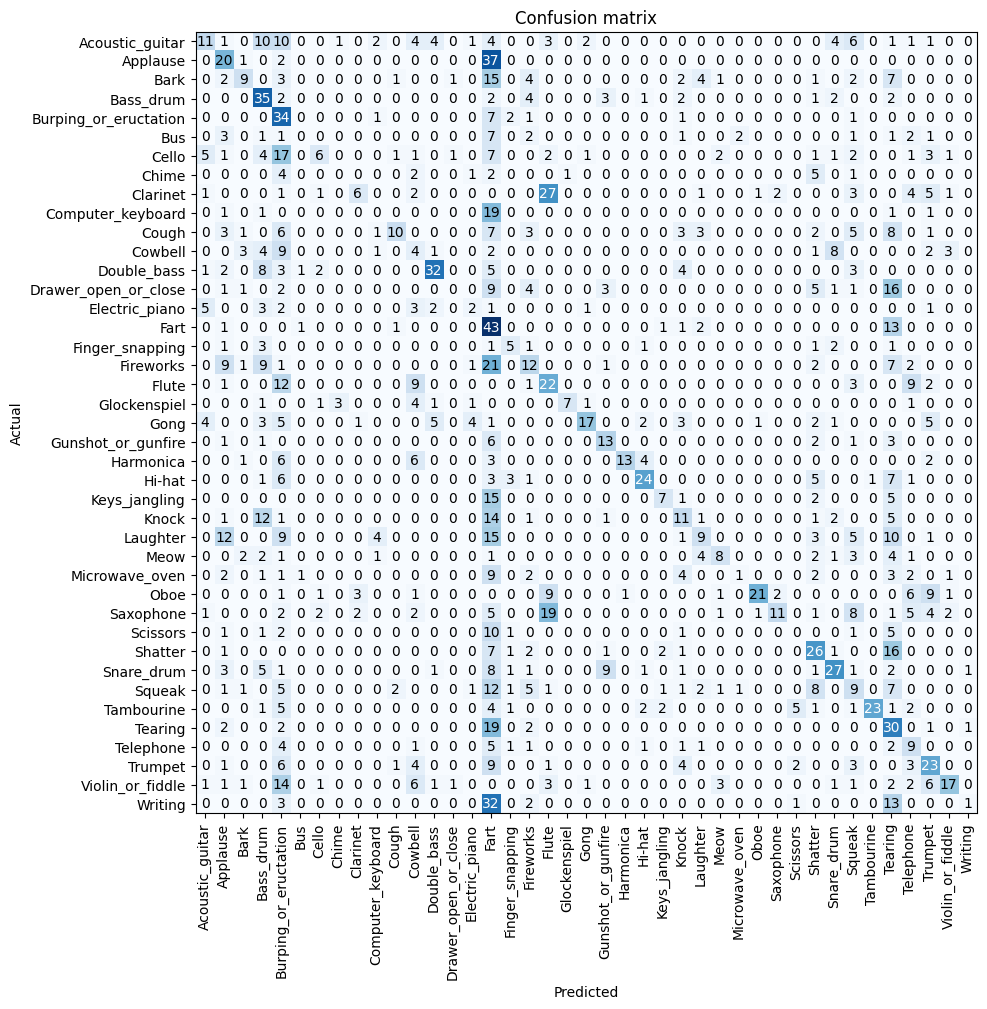

In [61]:

#plt.figure(figsize=(1000,1000))
a.plot_confusion_matrix(figsize=(10,10), dpi = 100)

